In [1]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, roc_curve, f1_score, classification_report, auc
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
scd_after_df = pd.read_csv("(after) Social interaction diversity features.csv")

In [3]:
scd_after_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 4 columns):
Actor               49739 non-null int64
A_Acc               49739 non-null int64
Social_diversity    49739 non-null float64
Type                49739 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ MB


In [4]:
scd_after_df.head()

,Actor,A_Acc,Social_diversity,Type
0,1047,6482393,0.6407,Human
1,1049,6275719,1.3499,Human
2,1120,6596993,0.6931,Human
3,1164,6670686,0.9345,Human
4,1184,4220231,0.9736,Human


In [33]:
# Renaming columns in readable format to understand what each column represents.
scd_after_df_copy = scd_after_df.copy()

col_names=['Actor','Aion_Account','Social_diversity','Player_Type']
scd_after_df_copy.columns=col_names
scd_after_df.columns=col_names
print(scd_after_df.shape)
print(scd_after_df_copy.shape)

(49739, 4)
(49739, 4)


In [6]:
scd_after_df_copy.head()

,Actor,Aion_Account,Social_diversity,Player_Type
0,1047,6482393,0.6407,Human
1,1049,6275719,1.3499,Human
2,1120,6596993,0.6931,Human
3,1164,6670686,0.9345,Human
4,1184,4220231,0.9736,Human


In [7]:
# Change Type as Category
scd_after_df_copy.Player_Type = scd_after_df_copy.Player_Type.astype('category')

In [34]:
# Creating a numerical field for Type
scd_after_df_copy.Player_Type.replace({'Human': 0, 'Bot': 1}, inplace=True)

In [35]:
scd_after_df_copy.head()

,Actor,Aion_Account,Social_diversity,Player_Type
0,1047,6482393,0.6407,0
1,1049,6275719,1.3499,0
2,1120,6596993,0.6931,0
3,1164,6670686,0.9345,0
4,1184,4220231,0.9736,0


In [9]:

type_dict = {0 : 'Human', 1: 'Bot'}

# Pairplot Analysis 

C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


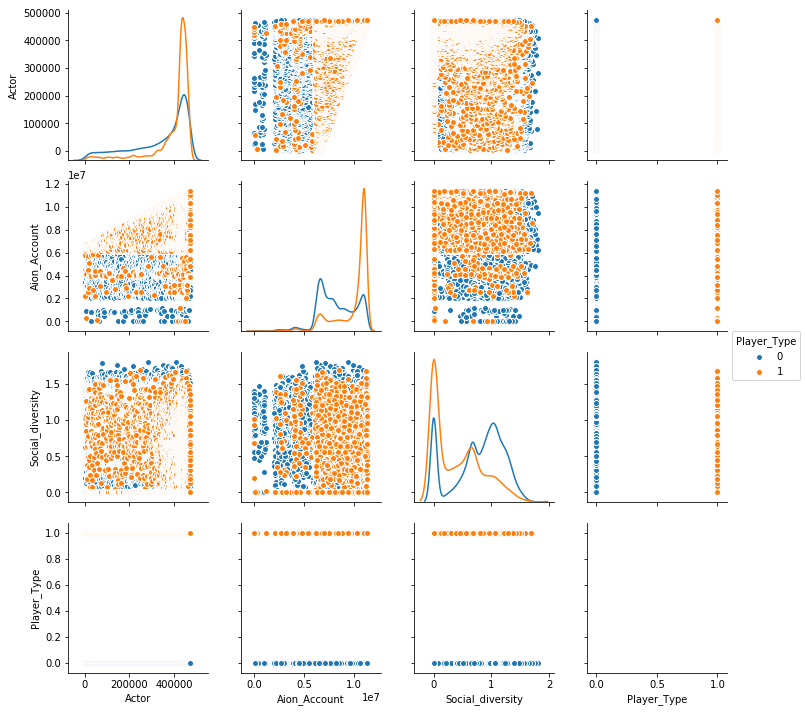

In [10]:
sns.pairplot(scd_after_df_copy, diag_kind="kde", hue="Player_Type")

In [11]:
#Lets analysze the distribution of the various attributes
scd_after_df_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Actor,49739.0,3.449409e+05,1.276346e+05,1047.0,2.721540e+05,4.005830e+05,4.422005e+05,4.728980e+05
Aion_Account,49739.0,8.483737e+06,1.963675e+06,0.0,6.878566e+06,8.290550e+06,1.043333e+07,1.136939e+07
Social_diversity,49739.0,7.287657e-01,4.547651e-01,0.0,4.101000e-01,8.148000e-01,1.082200e+00,1.809500e+00
Player_Type,49739.0,1.256559e-01,3.314645e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


[['Social_diversity']]


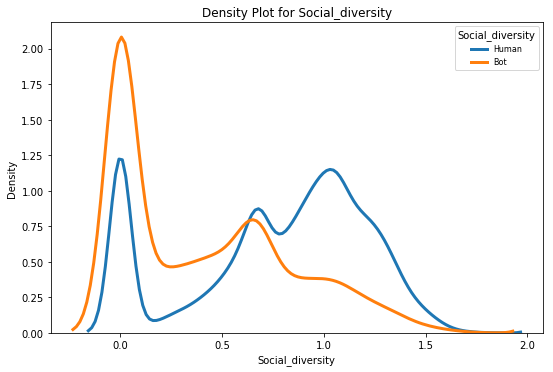

In [12]:
grid_spec = plt.GridSpec(nrows=6, ncols=3, wspace=0.2, hspace=0.2)

cols_to_view = ['Social_diversity']

cols_to_view_arr = np.array(cols_to_view)
cols_to_view_arr = np.squeeze(cols_to_view_arr)
cols_to_view_matrix = cols_to_view_arr.reshape(1, 1)
print(cols_to_view_matrix)

plt.figure(figsize=(30,40))
for x in range(1):
    for y in range(1):
        col = cols_to_view_matrix[x, y]
        plt.subplot(grid_spec[x, y])
        for player_type in [0, 1]:
            subset = scd_after_df_copy[scd_after_df_copy.Player_Type == player_type]
            sns.distplot(subset[col], hist=False, kde=True,
                         kde_kws={'linewidth': 3}, label=type_dict.get(player_type))
        # Plot formatting
        plt.legend(prop={'size': 8}, title = col)
        plt.title('Density Plot for %s' % col)
        plt.xlabel(col)
        plt.ylabel('Density')


# The Shannon Social diversity index is good indicator of Human vs Bot differentiation.

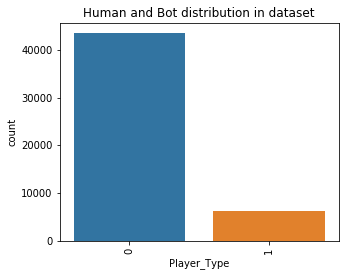

In [13]:
from matplotlib import pyplot as plt
# to bring the plot picture size of width 10 and height 5
plt.figure(figsize=(5,4))
# count plot on Make vs cardata_df
sns.countplot(x='Player_Type', data=scd_after_df_copy)
# to display the Make name vertical in X- axis
plt.xticks(rotation='vertical')
plt.title('Human and Bot distribution in dataset')
plt.show()

In [31]:
X_cols=['Actor','Aion_Account','Social_diversity']
y_col = ['Player_Type']

X = scd_after_df_copy[X_cols]
y = scd_after_df_copy[y_col]



In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(34817, 3)
(34817, 1)
(14922, 3)
(14922, 1)


# Algorithms and comparison

In [47]:
results = []
model_names = []
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
for model_name, model in models:
    print("Running model %s" % model_name)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = model.score(X_test, y_test)
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test, y_predict))
    print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
    print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
    print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
    print("Classification Report: ")
    print(classification_report(y_test, y_predict, [0, 1]))

Running model LR
Confusion Matrix: 
[[13087     0]
 [ 1835     0]]
Overall precision of LR: 0.0
Overall recall of LR: 0.0
Overall F1 Score of LR: 0.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     13087
           1       0.00      0.00      0.00      1835

   micro avg       0.88      0.88      0.88     14922
   macro avg       0.44      0.50      0.47     14922
weighted avg       0.77      0.88      0.82     14922

Running model LDA
Confusion Matrix: 

C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision


[[12934   153]
 [ 1680   155]]
Overall precision of LDA: 0.5032467532467533
Overall recall of LDA: 0.08446866485013624
Overall F1 Score of LDA: 0.14465702286514232
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     13087
           1       0.50      0.08      0.14      1835

   micro avg       0.88      0.88      0.88     14922
   macro avg       0.69      0.54      0.54     14922
weighted avg       0.84      0.88      0.84     14922

Running model KNN


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


Confusion Matrix: 
[[12592   495]
 [ 1090   745]]
Overall precision of KNN: 0.6008064516129032
Overall recall of KNN: 0.40599455040871935
Overall F1 Score of KNN: 0.48455284552845523
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     13087
           1       0.60      0.41      0.48      1835

   micro avg       0.89      0.89      0.89     14922
   macro avg       0.76      0.68      0.71     14922
weighted avg       0.88      0.89      0.88     14922

Running model CART


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Confusion Matrix: 
[[12785   302]
 [ 1030   805]]
Overall precision of CART: 0.7271906052393857
Overall recall of CART: 0.43869209809264303
Overall F1 Score of CART: 0.5472467709041469
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     13087
           1       0.73      0.44      0.55      1835

   micro avg       0.91      0.91      0.91     14922
   macro avg       0.83      0.71      0.75     14922
weighted avg       0.90      0.91      0.90     14922

Running model NB
Confusion Matrix: 
[[13087     0]
 [ 1835     0]]
Overall precision of NB: 0.0
Overall recall of NB: 0.0
Overall F1 Score of NB: 0.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     13087
           1       0.00      0.00      0.00      1835

   micro avg       0.88      0.88      0.88     14922
   macro avg       0.44      0.50      0.47     14922
weighted avg      

C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in la

Confusion Matrix: 
[[13087     0]
 [ 1828     7]]
Overall precision of SVM: 1.0
Overall recall of SVM: 0.0038147138964577656
Overall F1 Score of SVM: 0.00760043431053203
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     13087
           1       1.00      0.00      0.01      1835

   micro avg       0.88      0.88      0.88     14922
   macro avg       0.94      0.50      0.47     14922
weighted avg       0.89      0.88      0.82     14922



In [ ]:
for model_name, model in models:
    kfold_cv = model_selection.KFold(n_splits=10, random_state=23)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold_cv, scoring='accuracy')
    #print(model_name, cv_results)
    results.append(cv_results)
    model_names.append(model_name)
    msg = "%s: %f (%f)" % (model_name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

LR: 0.874345 (0.075425)


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning

LDA: 0.868614 (0.075293)


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhishri\AppData\Local\Continuum\anac

KNN: 0.862020 (0.078069)


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhishri\AppData\Local\Continuum\anacond

CART: 0.880476 (0.058572)
NB: 0.874345 (0.075425)


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning

# Sampling with SMOTE,Centroids, Random over sampler and Random under sampler

In [12]:
#X = nm_df_z_t_c[X_cols]
#y = nm_df_z_t_c[y_col]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#print(type(y_train))

model = RandomForestClassifier(max_depth=5)
model_name = 'RFC'
auc_metrics = []

# Running logistic regression after Resampling the data using ClusterCentroids
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
#cc = ClusterCentroids()  

print("Before UpSampling, counts of label 1: %d" % (sum(y_train.values==1)))
print("Before UpSampling, counts of label 0: %d" % (sum(y_train.values==0)))
sm = SMOTE(k_neighbors = 5)   #Synthetic Minority Over Sampling Technique
X_train_resample, y_train_resample = sm.fit_sample(X_train, y_train)
#X_train_resample, y_train_resample = cc.fit_sample(X_train, y_train)
print("After UpSampling, counts of label '1': %s" % (sum(y_train_resample==1)))
print("After UpSampling, counts of label '0': %s" % (sum(y_train_resample==0)))
#print("After UpSampling, the shape of train_X: %s" % (X_train_resample.shape))
#print("After UpSampling, the shape of train_y: %s" % (y_train_resample.shape))

model.fit(X_train_resample, y_train_resample)
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
print("Model score %s" % score)
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_predict))
print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
print("Classification Report: ")
print(classification_report(y_test, y_predict, [0, 1]))
fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
print("AUC %s" % roc_auc)
auc_metrics.append((model_name, fpr, tpr, roc_auc))
print("-------------------------------------------------")

Before UpSampling, counts of label 1: 4415
Before UpSampling, counts of label 0: 30402


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After UpSampling, counts of label '1': 30402
After UpSampling, counts of label '0': 30402


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model score 0.821538667738909
Confusion Matrix: 
[[11072  2015]
 [  648  1187]]
Overall precision of RFC: 0.3707058088694566
Overall recall of RFC: 0.646866485013624
Overall F1 Score of RFC: 0.4713122890609491
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.85      0.89     13087
           1       0.37      0.65      0.47      1835

   micro avg       0.82      0.82      0.82     14922
   macro avg       0.66      0.75      0.68     14922
weighted avg       0.87      0.82      0.84     14922

AUC 0.7464484484363604
-------------------------------------------------


In [13]:

model = RandomForestClassifier(max_depth=5)
model_name = 'RFC'
auc_metrics = []

# Running logistic regression after Resampling the data using ClusterCentroids
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
cc = ClusterCentroids()  

print("Before DownSampling, counts of label 1: %d" % (sum(y_train.values==1)))
print("Before DownSampling, counts of label 0: %d" % (sum(y_train.values==0)))
#sm = SMOTE(sampling_strategy = 1, k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
#X_train_resample, y_train_resample = sm.fit_sample(X_train, y_train)
X_train_resample, y_train_resample = cc.fit_sample(X_train, y_train)
print("After DownSampling, counts of label '1': %s" % (sum(y_train_resample==1)))
print("After DownSampling, counts of label '0': %s" % (sum(y_train_resample==0)))
#print("After UpSampling, the shape of train_X: %s" % (X_train_resample.shape))
#print("After UpSampling, the shape of train_y: %s" % (y_train_resample.shape))

model.fit(X_train_resample, y_train_resample)
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
print("Model score %s" % score)
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_predict))
print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
print("Classification Report: ")
print(classification_report(y_test, y_predict, [0, 1]))
fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
print("AUC %s" % roc_auc)
auc_metrics.append((model_name, fpr, tpr, roc_auc))
print("-------------------------------------------------")


Before DownSampling, counts of label 1: 4415
Before DownSampling, counts of label 0: 30402


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After DownSampling, counts of label '1': 4415
After DownSampling, counts of label '0': 4415
Model score 0.6627797882321405
Confusion Matrix: 
[[8426 4661]
 [ 371 1464]]
Overall precision of RFC: 0.2390204081632653
Overall recall of RFC: 0.7978201634877384
Overall F1 Score of RFC: 0.3678391959798995
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.64      0.77     13087
           1       0.24      0.80      0.37      1835

   micro avg       0.66      0.66      0.66     14922
   macro avg       0.60      0.72      0.57     14922
weighted avg       0.87      0.66      0.72     14922

AUC 0.720832600273708
-------------------------------------------------


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
model = RandomForestClassifier(max_depth=5)
model_name = 'RFC'
auc_metrics = []


# Running logistic regression after Resampling the data using ClusterCentroids
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()


print("Before DownSampling, counts of label 1: %d" % (sum(y_train.values==1)))
print("Before DownSampling, counts of label 0: %d" % (sum(y_train.values==0)))
X_train_resample, y_train_resample = ros.fit_sample(X_train, y_train)
print("After DownSampling, counts of label '1': %s" % (sum(y_train_resample==1)))
print("After DownSampling, counts of label '0': %s" % (sum(y_train_resample==0)))
#print("After UpSampling, the shape of train_X: %s" % (X_train_resample.shape))
#print("After UpSampling, the shape of train_y: %s" % (y_train_resample.shape))

model.fit(X_train_resample, y_train_resample)
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
print("Model score %s" % score)
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_predict))
print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
print("Classification Report: ")
print(classification_report(y_test, y_predict, [0, 1]))
fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
print("AUC %s" % roc_auc)
auc_metrics.append((model_name, fpr, tpr, roc_auc))
print("-------------------------------------------------")

Before DownSampling, counts of label 1: 4415
Before DownSampling, counts of label 0: 30402
After DownSampling, counts of label '1': 30402

C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



After DownSampling, counts of label '0': 30402
Model score 0.8251574855917437
Confusion Matrix: 
[[11086  2001]
 [  608  1227]]
Overall precision of RFC: 0.38011152416356875
Overall recall of RFC: 0.6686648501362398
Overall F1 Score of RFC: 0.48469286984001575
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.85      0.89     13087
           1       0.38      0.67      0.48      1835

   micro avg       0.83      0.83      0.83     14922
   macro avg       0.66      0.76      0.69     14922
weighted avg       0.88      0.83      0.84     14922

AUC 0.7578825129415822
-------------------------------------------------


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
model = RandomForestClassifier(max_depth=5)
model_name = 'RFC'
auc_metrics = []


# Running logistic regression after Resampling the data using ClusterCentroids
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()


print("Before DownSampling, counts of label 1: %d" % (sum(y_train.values==1)))
print("Before DownSampling, counts of label 0: %d" % (sum(y_train.values==0)))
X_train_resample, y_train_resample = rus.fit_sample(X_train, y_train)
print("After DownSampling, counts of label '1': %s" % (sum(y_train_resample==1)))
print("After DownSampling, counts of label '0': %s" % (sum(y_train_resample==0)))
#print("After UpSampling, the shape of train_X: %s" % (X_train_resample.shape))
#print("After UpSampling, the shape of train_y: %s" % (y_train_resample.shape))

model.fit(X_train_resample, y_train_resample)
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
print("Model score %s" % score)
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_predict))
print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
print("Classification Report: ")
print(classification_report(y_test, y_predict, [0, 1]))
fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
print("AUC %s" % roc_auc)
auc_metrics.append((model_name, fpr, tpr, roc_auc))
print("-------------------------------------------------")

Before DownSampling, counts of label 1: 4415
Before DownSampling, counts of label 0: 30402
After DownSampling, counts of label '1': [4415]
After DownSampling, counts of label '0': [4415]
Model score 0.8023053210025466
Confusion Matrix: 
[[10703  2384]
 [  566  1269]]
Overall precision of RFC: 0.34738571037503424
Overall recall of RFC: 0.6915531335149864
Overall F1 Score of RFC: 0.46246355685131196
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     13087
           1       0.35      0.69      0.46      1835

   micro avg       0.80      0.80      0.80     14922
   macro avg       0.65      0.75      0.67     14922
weighted avg       0.88      0.80      0.83     14922

AUC 0.754693812879599
-------------------------------------------------


C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# Hyperparameter Tuning

# Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV


In [40]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 15, 20],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 150, 200]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [41]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);
grid_search.best_params_
best_grid = grid_search.best_estimator_
#grid_accuracy = evaluate(best_grid, test_features, test_labels)
#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 35.1min finished
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [43]:
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

# RandomSearch with Cross Validation

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [19]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.5min finished
C:\Users\abhishri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [20]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 35,
 'bootstrap': True}

In [21]:
rf_random.cv_results_

{'mean_fit_time': array([ 3.81638845,  3.73881499,  4.13894558,  0.79198488,  2.40371291,
         5.4496158 ,  4.25657558,  5.93550054,  2.99276153,  5.46528077,
        12.94710501, 11.53457085, 11.10219121,  2.70365572,  2.01907833,
         3.88576889,  1.19157648,  6.94441525,  6.15307593,  7.10962613,
         3.04076433,  0.92278854,  0.84290878,  8.69769049,  2.2874918 ,
         0.27740431,  5.93852313,  1.50619992,  3.71345766,  3.47420351,
         1.24987054,  8.50740711,  2.35021091, 10.37516991,  2.79987399,
         0.46211179,  1.54903634,  0.66334597,  7.13372175,  2.40891997,
         1.29575674,  0.88519208,  1.60542281,  0.65271846,  7.40639472,
         5.9680628 ,  3.7294778 ,  0.57686806,  7.94084064, 10.31941319,
         6.41992402,  2.24994198, 12.57903314,  3.63449303,  9.58082048,
         6.141174  ,  5.29926578, 12.47404083,  3.86074678,  6.81848367,
         1.79067294,  6.9331971 ,  7.20648551,  3.98900723,  1.69477344,
         4.13153807,  4.27580253, 